$
    \def\given{\,\middle|\,}
    \newcommand{\setm}{\setminus}
    \newcommand{\Pr}[1]{\mathbf{P}\left(#1 \right)}
    \newcommand{\given}{\,\middle|\,}
    \newcommand{\qp}[1]{\left(#1\right)}
    \newcommand{\Var}[1]{\mathrm{Var}\left[#1\right\]}
    \newcommand{\E}[1]{\mathrm{E}\left[#1\right\]}
$

# Math 451: Homework 2
- Submitted 9/19/17 by Colton Grainger for Math 451-1: Probability Theory, Engineering Outreach
- **Text:** *Stochastic Modeling and Mathematical Statistics* by Francisco J. Samaniego, CRC Press

## &sect;  1.8
### Prob 19

Consider the random experiment:
- Flip a fair coin to choose from two urns $U_1$ and $U_2$, then
    - Select from $4$ red and $2$ white balls in $U_1$ or 
    - Select from $3$ red and $4$ white balls in $U_2$.
    
I've plotted a probability tree below.

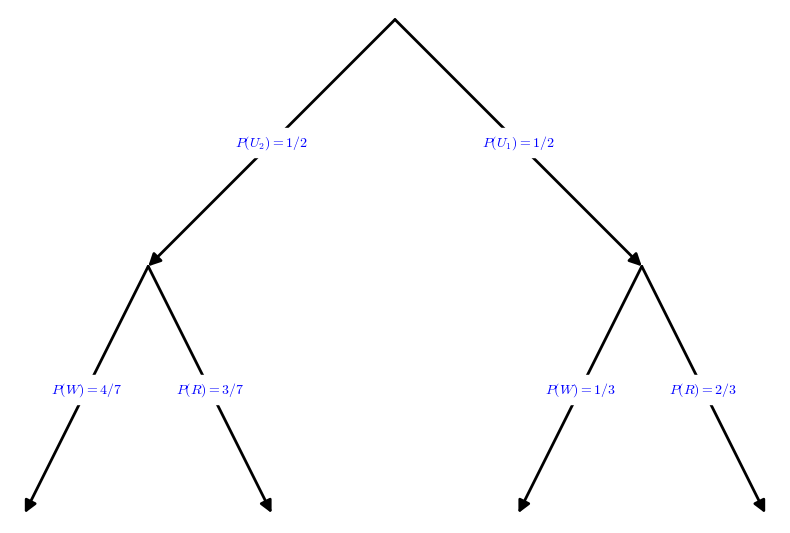

In [1]:
urn = DiGraph()
urn.add_edge(0, 2, '$P(U_2)=1/2$')
urn.add_edge(0, 1, '$P(U_1)=1/2$')
urn.add_edge(1, 3, '$P(R)=2/3$')
urn.add_edge(1, 4, '$P(W)=1/3$')
urn.add_edge(2, 5, '$P(R)=3/7$')
urn.add_edge(2, 6, '$P(W)=4/7$')
urn.plot(layout='tree', edge_labels=True, vertex_labels=False, vertex_size=0)

The probability of choosing a red ball is the sum of the probabilities of all simple events which produce red balls. Those events are $U_1 \cap R$ and $U_2 \cap R$; the probability is
$$
    \Pr{B} = \Pr{U_1 \cap R}+\Pr{U_2 \cap R} = \frac12\cdot\frac23 + \frac13\cdot\frac3{14} = \frac{16}{21}.
$$

Given a red ball, the probability of having choosen from $U_1$ is found with the definition of conditional probability:
$$
    \Pr{U_1\given R} = \frac{\Pr{U_1\cap R}}{\Pr{R}} = \frac{\frac13}{\frac{16}{21}} = \frac{21}{48}.
$$


## Prob 21

Suppose that a conference attendee randomly chooses to enter a talk on $L$ logistics, $C$ cybernetics, or $N$ nanostatistics. Suppose further that 
- the talk $L$ is insufferable with probability $1/6$, 
- the talk $C$ is too with probability $1/3$, and 
- the talk $N$ is very likely insufferable with probability $2/3$.

I've graphed the insufferable paths in the probability tree below.

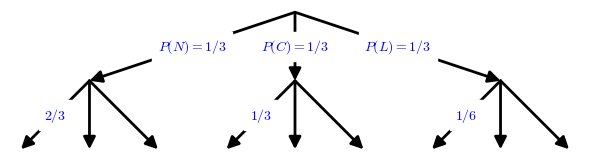

In [2]:
cn = DiGraph()
cn.add_edge(0, 1, '$P(L)=1/3$')
cn.add_edge(0, 2, '$P(C)=1/3$')
cn.add_edge(0, 3, '$P(N)=1/3$')
cn.add_edge(1, 4, '')
cn.add_edge(1, 5, '')
cn.add_edge(1, 6, '$1/6$')
cn.add_edge(2, 7, '')
cn.add_edge(2, 8, '')
cn.add_edge(2, 9, '$1/3$')
cn.add_edge(3, 10,'')
cn.add_edge(3, 11,'')
cn.add_edge(3, 12,'$2/3$')
cn.plot(layout='tree', edge_labels=True, vertex_labels=False, vertex_size=0)

The probability that the attendee made it to an insufferable $I$ talk is 
$$
    \Pr{I} = \Pr{L\cap I} + \Pr{C\cap I} + \Pr{N\cap I} = \frac5{18}
$$

Given that the attendee's talk was insufferable, the probability that they went to a cybernetics talk is
$$
    \Pr{C \given I} = \frac{\Pr{C \cap I}}{\Pr{I}} = \frac25.
$$

## Prob 24

Suppose of all people visiting a co-op, 
- $3/5$ are shopping for bagels $B$, 
- $3/10$ are shopping for legumes $L$, and 
- $1/10$ are shopping for mystic tea leaves $T$.

Further, suppose that 
- folks in $B$ see a dude they know $D$ with probability $1/5$,
- folks in $L$ see a dude they know $D$ with probability $3/10$, and 
- folks in $T$ see a dude they know $D$ with probability $9/10$.

I've plotted the paths to $D$ in the probability tree below.

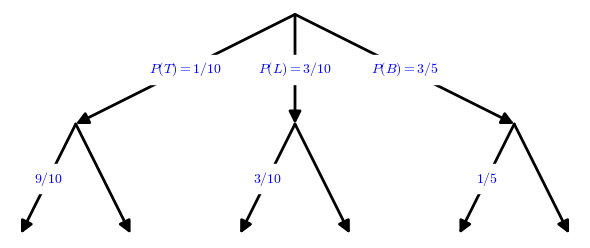

In [3]:
coop = DiGraph()
coop.add_edge(0, 1, '$P(B)=3/5$')
coop.add_edge(0, 2, '$P(L)=3/10$')
coop.add_edge(0, 3, '$P(T)=1/10$')
coop.add_edge(1, 4, '')
coop.add_edge(1, 5, '$1/5$')
coop.add_edge(2, 6, '')
coop.add_edge(2, 7, '$3/10$')
coop.add_edge(3, 8, '')
coop.add_edge(3, 9, '$9/10$')
coop.plot(layout='tree', edge_labels=True, vertex_labels=False, vertex_size=0)

What's the probability that any person visiting the co-op sees a dude they know? Well, it's the sum of the probabilities of each the simple events where a person sees $D$,
$$
    \Pr{D} = \frac35\cdot\frac15 + \frac3{10}\cdot\frac3{10} + \frac1{10}\frac9{10} = \frac3{10}.
$$

Given that a person sees a dude they know, what's the probability that they're looking for bagels? Using the definition of conditional probability, we find
$$
    \Pr{B \given D} = \frac{\Pr{B \cap D}}{\Pr{D}} = \frac3{25}\cdot\frac{10}3 = \frac25.
$$

What's the probability that atleast $4$ of $5$ people in population $T$ experience event $D$? Well, suppose $p = \Pr{D \given T}$ is the probability of "success" in a Bernoulli trial that a person looking for tea leaves $T$ runs into a dude they know $D$ at the co-op. 

In $5$ independent repeated trials, 
- there's only ${5\choose 5}$ way in which everyone searching for tea sees a dude they know and 
- there are ${5 \choose 4}$ ways in which exactly $4$ persons searching for tea see a dude they know.

Whence, the probability of at least $4$ successes is the sum
$$
    {5 \choose 5}(p)^5(1-p)^0 + {5 \choose 4}(p)^4(1-p)^1
        = \qp{\frac9{10}}^5 + 5\qp{\frac9{10}}^4\frac1{10}
        = 0.91854.
$$

## Prob 26

Suppose that a student knows $K$ the correct answer $C$ to any multiple choice exam question with probability $7/10$. In the case that the student does not know $K^c$ the correct answer, assume the student guesses,the correct answer with probability $1/5$.

I've plotted a probability tree to depict the student answering a single question on the exam.

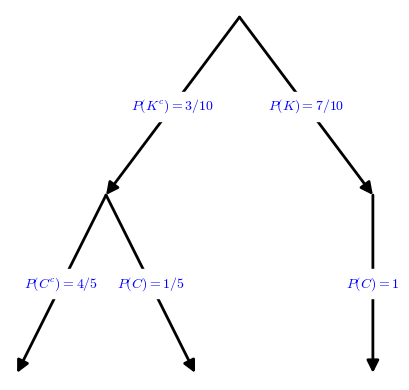

In [4]:
exam = DiGraph()
exam.add_edge(0, 1, '$P(K)=7/10$')
exam.add_edge(0, 2, '$P(K^c)=3/10$')
exam.add_edge(1, 3, '$P(C)=1$')
exam.add_edge(2, 4, '$P(C)=1/5$')
exam.add_edge(2, 5, '$P(C^c)=4/5$')
exam.plot(layout='tree', edge_labels=True, vertex_labels=False, vertex_size=0)

The probability that the student obtains the correct answer $C$ is the sum of the probabilities of each simple event containing $C$, i.e., 
$$
    \Pr{C} = \Pr{K\cap C} + \Pr{K^c \cap C} = \frac7{10} + \frac3{10}\frac15 = \frac{19}{25}.
$$

What's the probability the student knows $K$ an answer given they're correct $C$? Well, with the definition of conditional probability, we write
$$
    \Pr{K \given C} = \frac{\Pr{K \cap C}}{\Pr{C}} = \frac7{10}\cdot\frac{25}9 = \frac{35}{38}.
$$

Let $\Pr{C} = p$ be the probability of success in a Bernoulli trial. The probability of $2$ successes in $3$ trials is 
$$ 
    {3\choose 2} p^2(1-p)^1 = 3\qp{\frac{19}{25}}^2\qp{\frac6{25}} \approx 0.4159.
$$

## Prob 28
Consider the probability tree below, relating a merchant's widget manufacturers, $A$, $B$, $C$, to the likelihood that their widgets are defective, $D$ (shown as the left leaves).

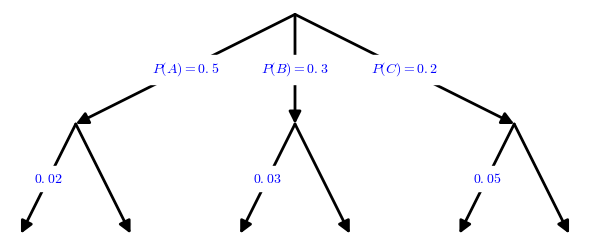

In [5]:
wgt = DiGraph()
wgt.add_edge(0, 1, '$P(C)=0.2$')
wgt.add_edge(0, 2, '$P(B)=0.3$')
wgt.add_edge(0, 3, '$P(A)=0.5$')
wgt.add_edge(1, 4, '')
wgt.add_edge(1, 5, '$0.05$')
wgt.add_edge(2, 6, '')
wgt.add_edge(2, 7, '$0.03$')
wgt.add_edge(3, 8, '')
wgt.add_edge(3, 9, '$0.02$')
wgt.plot(layout='tree', edge_labels=True, vertex_labels=False, vertex_size=0)

What's the probability that any one of the merchant's widgets is defective? Well, summing the probabilities of the $3$ simple events where the widget is defective, we find
$$
    \Pr{D} = 0.01 + 0.009 + 0.01 = 0.029.
$$

What's the probability that a defective widget was manufacture by $A$? by $B$? by $C$? Well, citing the definition of conditional probability for each case
$$
\begin{align}
    \Pr{A \given D} 
        &= \frac{\Pr{A \cap D}}{\Pr{D}}
        &\approx 0.345,\\
    \Pr{B \given D} 
        &= \frac{\Pr{B \cap D}}{\Pr{D}}
        &\approx 0.310,\\ 
    \Pr{C \given D} 
        &= \frac{\Pr{C \cap D}}{\Pr{D}}
        &\approx 0.345.\\
\end{align}
$$

## Prob 34

Suppose, of $3$ persons in prison, $2$ will be randomly released from a prison.

Why is it *not true* that, asking a prison guard to *name one person* who'll be released, decreases the probability of being released? 

Well, one of our prisoners, Jim, is a pessimist; he takes for certain that the probability he will not be released upon asking the guard is $1$. It follows that if Jim asks the guard who will be released, Jim has a $1/2$ chance of being released.

Fortunately (for the definition of conditional probablity), Jim is mistaken in his certainty: He has a $2/3$ probability of release *whether or not* he asks the gaurd.

Consider the probability of release without asking. It is obviously $P(R)=2/3$ (see below).


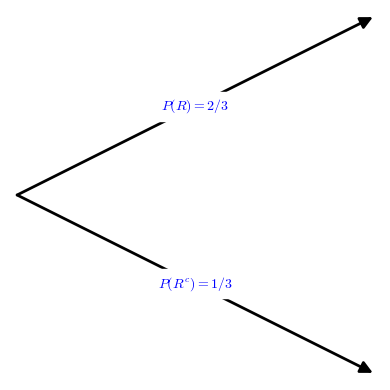

In [6]:
noask = DiGraph()
noask.add_edge(0, 1, '$P(R)=2/3$')
noask.add_edge(0, 2, '$P(R^c)=1/3$')
noask.plot(layout='tree', edge_labels=True, vertex_labels=False, vertex_size=0, tree_orientation = 'right')

The probability of release *with asking* is also $\frac23$, because Jim has a $\frac13$ probability of being released *upon asking*, followed by either a guaranteed release or a release with probability $\frac12$. We verify by summing the probabilities for each simple event where Jim is released $R$,
$$
    \frac13 + \frac23\cdot\frac12 = \frac23,
$$
see below.

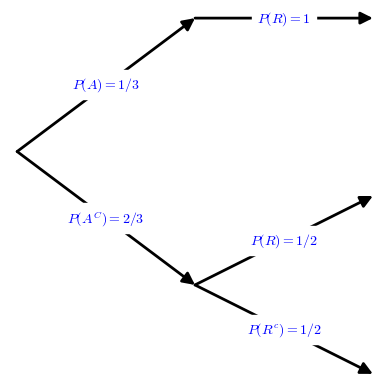

In [7]:
ask = DiGraph()
ask.add_edge(0, 1, '$P(A)=1/3$')
ask.add_edge(0, 2, '$P(A^C)=2/3$')
ask.add_edge(1, 3, '$P(R)=1$')
ask.add_edge(2, 4, '$P(R)=1/2$')
ask.add_edge(2, 5, '$P(R^c)=1/2$')
ask.plot(layout='tree', edge_labels=True, vertex_labels=False, vertex_size=0, tree_orientation = 'right')

## Prob 36
Suppose $n \leq 12$. Consider any single-valued function of the form
$$
    f_n\colon \{1, \ldots, n\} \to \{1, \ldots, 12\}.
$$

If we require that function $f_n$ is injective, there are ${12 \choose n}$ possible images $f_n(\{1, \ldots, n\})$. On the other hand, if we do not require that $f_n$ is injective, then there are $\frac{12^n}{n!}$ possible images of $f_n$.

The probability that at least two elements in $\{1, \ldots, n\}$ map under $f_n$ to the same number, given that $f_n$ is randomly determined, is $1$ minus the probability that $f_n$ is injective:
$$
\begin{align}
    1 - \Pr{f_n\text{ injective}}
        &= 1 - \frac{\left|\text{images of }f_n\text{ if injective}\right|}{\left|\text{images of }f_n\right|}\\
        &= 1 - \frac{11!}{(12-n)!12^{n-1}}.
\end{align}
$$

This is precisely the probability that at least two people in a room of $n$ have birthdays in the same ~month (twelfth) of a year. Here's a plot for integer values of $n$ with $0 \leq n \leq 12$.

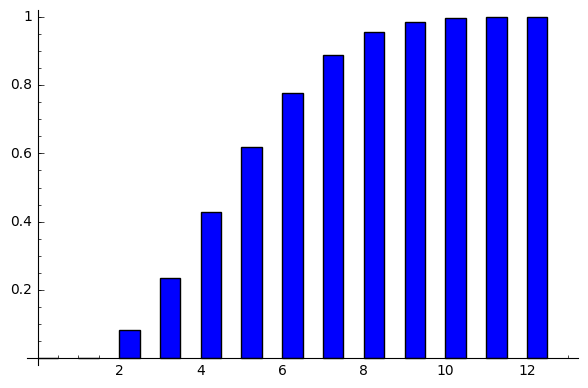

In [8]:
bar_chart([1 - factorial(11)*(factorial(12-n)*12^(n-1))^(-1) for n in [0..12]])

## Prob 40
Suppose that the events "chews tobacco" $T$ and "has bad breath" $B$ are events in a the sample space of attributes to baseball players. Let
$$
    \Pr{T} = \frac3{10}\\
    \Pr{B} = \frac25\\
    \Pr{B \cap T} = \frac14.
$$

From $\Pr{B \given T} = \frac14\cdot\frac{10}3 = \frac56$, we derive the complement $\Pr{B^c\given T} = \frac16$, whence 
$$
    \Pr{B^c \cap T} = \Pr{T}\Pr{B^c\given T} = \frac1{10}.
$$

From $\Pr{T\given B} = \frac14\cdot\frac52 = \frac58$, we derive the complement
$$
    \Pr{T^c\given B} = \frac38.
$$

## Prob 44

Consider the following table, where $p$ represents Papa, and $b$ represents Auntie Bee, and the entry at row $p$ and column $A$ is the probability that $p$ maps to $A$.

|   |$A$|$B$|$C$|
|---|---|---|---|
|$p$|1/2|1/6|1/6|
|$b$|1/8|5/8|1/4|

What's the probability $p$ and $b$ map to different sets? Well, there are $3^2$ permutations of $2$ elements choosen from $3$ with replacement. So the sample space has $9$ simple events.

But notice each simple event is not uniformly weighted, we cannot say the probability of some event $E$ is the ratio between the number of elements in $E$ and the number of elements in $\Omega$. We'll actually have to compute the probability by summing over each simple event of interest. 

To save energy, however, we recognize that the event $p$ and $b$ map to different sets is the complement of the event that $p$ and $b$ map to the same set. Our desired probability is thus
$$
    \Pr{\text{$p$ and $b$ diff}} = 1 - \left(\frac12\cdot\frac18+\frac16\cdot\frac58+\frac16\cdot\frac14\right) \approx 0.7916.
$$

Given that $p$ and $b$ map to different sets, what's the probability that either map to $A$? Well, the definition of conditional probability has it that 
$$
    \Pr{A \given \text{diff}} = \frac{\Pr{A \cap \text{diff}}}{\Pr{\text{diff}}} \approx 0.5526.
$$

## Prob 52

Suppose we run $6$ Bernoulli trials with probability of success $p = 3/5$. The event of at least a one success is complement to absolute failure.

Whence the probability of at least one success is given by
$$
    1 - {6 \choose 0}p^0(1-p)^6 = 1 - (2/5)^6 \approx 0.996.
$$

For sheer animal pleasure, I've graphed the probability of $n$ successes for $0\leq n \leq 6$.

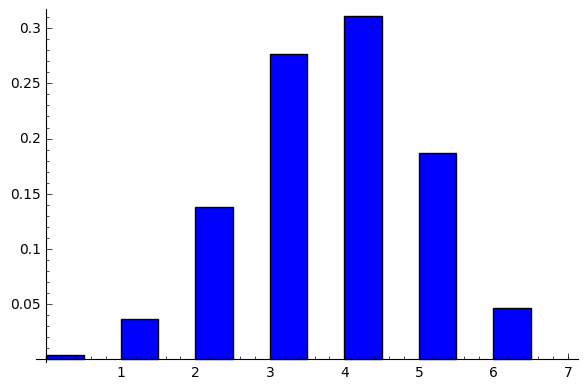

In [9]:
import scipy.stats
binom_dist = scipy.stats.binom(6,.6)
bar_chart([binom_dist.pmf(n) for n in range(7)])